In [1]:
#Φόρτωμα βιβλιοθηκών

In [2]:
import os
dependencies = [
    'pandas',
    'plotly',
    'dash',
    'dash-core-components',
    'dash-html-components',
    'jupyter-dash'
]
!pip install simplejson

# Concatenate the dependencies into a single string separated by spaces
dependencies_str = ' '.join(dependencies)

# Use the pip command with os.system to install the dependencies
os.system(f'pip install {dependencies_str}')



import pandas as pd
import dash
#import dash_core_components as dcc
#import dash_html_components as html
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
from dash import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import json
import plotly.graph_objs as go


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


/tmp/ipykernel_25673/1234800295.py:30: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_25673/1234800295.py:31: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
#Φόρτωμα Κώδικα για Κατηγοριοποίηση παραπόνων

In [4]:
df = pd.read_csv("/home/george/Downloads/ComplaintsDataset.csv")
# Convert the entry date column to datetime type
df['Entry Date'] = pd.to_datetime(df['Entry Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# Calculate the count of complaints by day, week, and month
df_day = df.groupby(df['Entry Date'].dt.date).size().reset_index(name='count')
df_week = df.groupby(df['Entry Date'].dt.to_period('W-MON').astype(str))['Λεπτομέρειες'].count().reset_index(name='count')
df_month = df.groupby(df['Entry Date'].dt.to_period('M').astype(str))['Λεπτομέρειες'].count().reset_index(name='count')

#Load problem dataset (with 5 labels)
df_p =pd.read_csv("/home/george/Downloads/ProblemData.csv")

# Create a pie chart for the complaint categories
category_counts = df_p['label'].value_counts()

In [5]:
#Φόρτωμα Κώδικα για Ανάλυση Συναισθήματος

In [6]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
frst_feeling=[]
scd_feeling=[]
trd_feeling=[]

with open("/home/george/Downloads/csv_file.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        row=str(row)
        # print(type(row))
        row = row.replace('[', '')
        row = row.replace(']', '')
        row = row.replace('"', '')
        row = row.replace("'", '')   
        words=[word for word in row.split(', ') if (word!= '' and word!='΄') ]
        # print("words=",words[0])
                 
        frst_feeling.append([words[0],float(words[1])])
        # print(frst_feeling[-1])
        if len(words)>2:
            scd_feeling.append([words[2],float(words[3])])
            if len(words)>4:
                trd_feeling.append([words[4],float(words[5])])


In [8]:

## Plot Pies

frst_feeling.sort(reverse=True) 
scd_feeling.sort(reverse=True) 
trd_feeling.sort(reverse=True) 
def plot_pie(feelings,title,i):
    k=1
    prc=[]

    #print(frst_feeling[k-1]['feel'])
    #print(frst_feeling[0][1])
    while k<len(feelings):
        print(prc)
        while feelings[k-1][0]==feelings[k][0]:
            #print(frst_feeling[k][0])
            if k<len(feelings)-1:
                k+=1
            else: break
            #print(k)
        if k<len(feelings)-1:
            k+=1
            #print(k,feelings[k][0])
            prc.append(k-1)
        else: break

    #print(prc)
    num_Surprise=prc[0]
    num_Sad=prc[1]-prc[0]
    num_Fear=prc[2]-prc[1]
    num_Disgust=prc[3]-prc[2]
    num_Anger=len(feelings)-prc[3]
    #print(num_sad,num_fear,num_disgust,num_anger)
    fst_perc=[num_Surprise,num_Sad,num_Fear,num_Disgust,num_Anger]
    
    myexplode = [0.1, 0.1, 0.1, 0.1,0.1]
    mycolors = ["black", "hotpink", "b", "#4CAF50","m"]
    labels=["Surprise","Sad","Fear","Disgust","Anger"]
    plt.figure(i)
    plt.pie(fst_perc,explode = myexplode, startangle = 90, colors = mycolors)
    plt.legend(labels,loc='lower right',title=title)

    return prc

[]
[636]
[636, 640]
[636, 640, 641]
[636, 640, 641, 687]
[]
[30]
[30, 62]
[30, 62, 101]
[30, 62, 101, 593]
[]
[10]
[10, 37]
[10, 37, 108]
[10, 37, 108, 184]


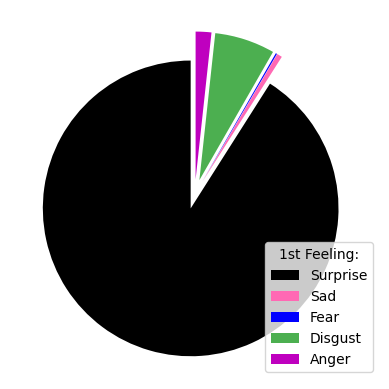

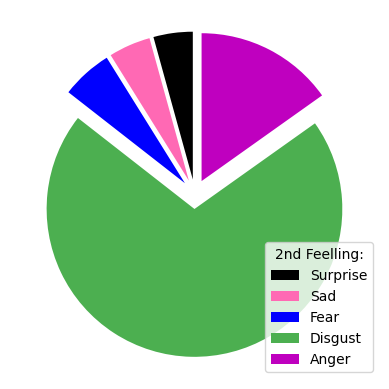

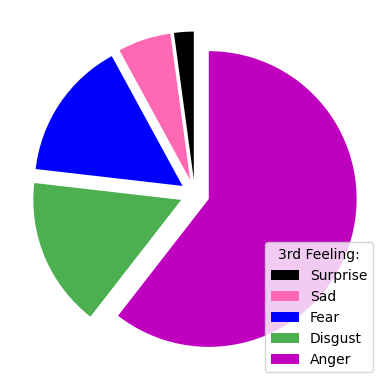

In [9]:
 
prc1=plot_pie(frst_feeling,"1st Feeling:",1)
prc2=plot_pie(scd_feeling,"2nd Feelling:",2)
prc3=plot_pie(trd_feeling,"3rd Feeling:",3)

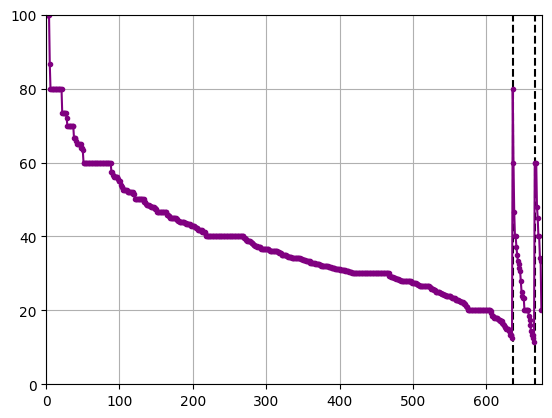

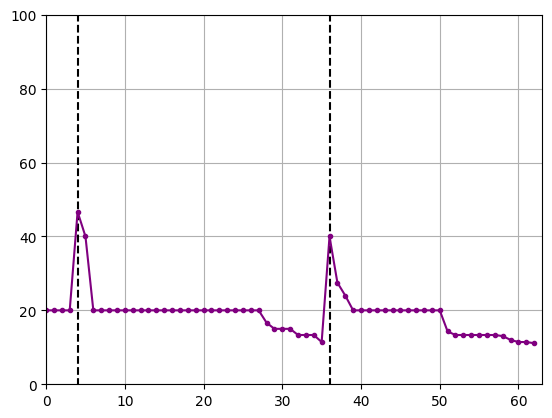

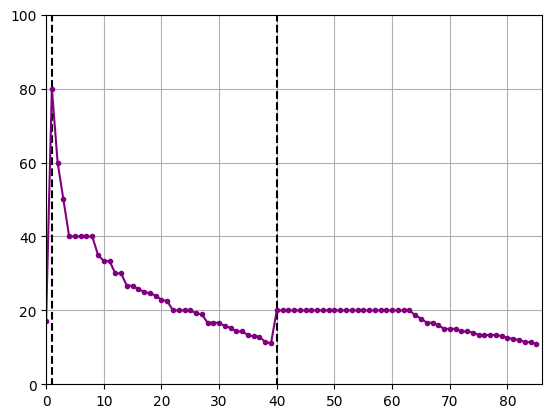

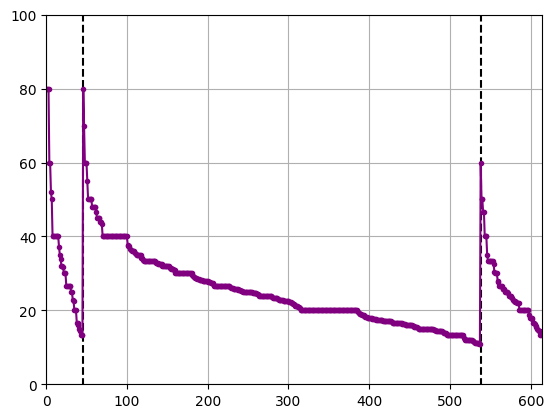

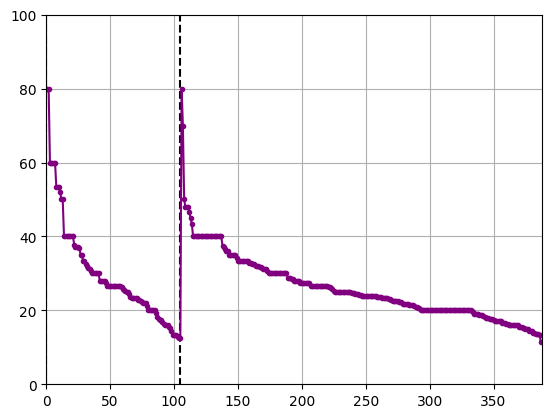

In [10]:
## Plot Percentages

def plot_per(frst_feeling,scd_feeling,trd_feeling,Feeling,start,i):
    rate=[]
    
    i=start[0]
    #print(frst_feeling[i][0])
    while frst_feeling[i][0]==Feeling:
        rate.append(frst_feeling[i][1])
        if i<len(frst_feeling)-1:
            i+=1
        else: break
    l1=i-start[0]
    
    i=start[1]
    while scd_feeling[i][0]==Feeling:
        rate.append(scd_feeling[i][1])
        if i<len(scd_feeling)-1:
            i+=1
        else: break
    l2=i+l1-start[1]
    
    i=start[2]
    while trd_feeling[i][0]==Feeling:
        rate.append(trd_feeling[i][1])
        if i<len(trd_feeling)-1:
            i+=1
        else: break

    #print(Feeling,": number of samples",len(rate))
    
    plt.figure(i)
    # plt.vlines(0, ymin=-10, ymax=110,colors='k', ls='--')
    plt.vlines(l1, ymin=-10, ymax=110,colors='k', ls='--')
    plt.vlines(l2, ymin=-10, ymax=110,colors='k', ls='--')
    # plt.vlines(len(rate), ymin=-10, ymax=110,colors='k', ls='--')
    plt.plot(rate,'.-',color="purple")

    plt.xlim((0,len(rate)))
    plt.ylim((0,100))
    plt.grid()

plot_per(frst_feeling,scd_feeling,trd_feeling,"Surprise",[0,0,0],4)
plot_per(frst_feeling,scd_feeling,trd_feeling,"Sadness", [prc1[0],prc2[0],prc3[0]],5)
plot_per(frst_feeling,scd_feeling,trd_feeling,"Fear",    [prc1[1],prc2[1],prc2[1]],6)
plot_per(frst_feeling,scd_feeling,trd_feeling,"Disgust", [prc1[2],prc2[2],prc3[2]],7)
plot_per(frst_feeling,scd_feeling,trd_feeling,"Anger",   [prc2[3],prc2[3],prc3[3]],8)


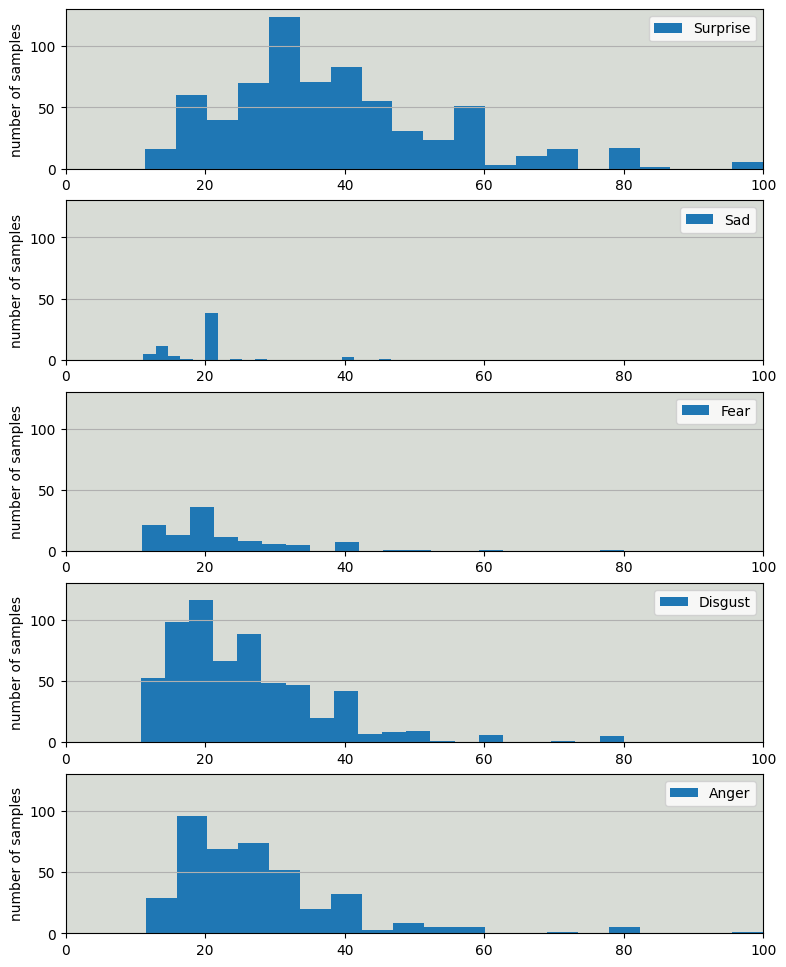

In [11]:
## Plot Histograms
# store data 
sur=[]
sad=[]
fear=[]
disg=[]
anger=[]

def store(frst_feeling,scd_feeling,trd_feeling, Feeling,start):
    store=[]
    i=start[0]
    #print(frst_feeling[i][0])
    while frst_feeling[i][0]==Feeling:
        store.append(frst_feeling[i][1])
        if i<len(frst_feeling)-1:
            i+=1
        else: break
        l1=i-start[0]

    i=start[1]
    while scd_feeling[i][0]==Feeling:
        store.append(scd_feeling[i][1])
        if i<len(scd_feeling)-1:
            i+=1
        else: break
    l2=i+l1-start[1]

    i=start[2]
    while trd_feeling[i][0]==Feeling:
        store.append(trd_feeling[i][1])
        if i<len(trd_feeling)-1:
            i+=1
        else: break
    return sorted(store)

store_sur=store(frst_feeling,scd_feeling,trd_feeling,"Surprise",[0,0,0])
store_sad=store(frst_feeling,scd_feeling,trd_feeling,"Sadness", [prc1[0],prc2[0],prc3[0]])
store_fear=store(frst_feeling,scd_feeling,trd_feeling,"Fear",   [prc1[1],prc2[1],prc3[1]])
store_disg=store(frst_feeling,scd_feeling,trd_feeling,"Disgust",[prc1[2],prc2[2],prc3[2]])
store_anger=store(frst_feeling,scd_feeling,trd_feeling,"Anger", [prc1[3],prc2[3],prc3[3]])


def hist_of_feel(store1,store2,store3,store4,store5,title):
    dist1 = pd.DataFrame(store1)
    dist2 = pd.DataFrame(store2)
    dist3 = pd.DataFrame(store3)
    dist4 = pd.DataFrame(store4)
    dist5 = pd.DataFrame(store5)

    fig, [ax1,ax2,ax3,ax4,ax5] = plt.subplots(nrows=5, ncols=1, figsize=(9, 12), sharey=True)
    
    dist1.plot.hist(bins=20, ax=ax1)
    ax1.grid(axis='y')
    ax1.set_facecolor('#d8dcd6')
    ax1.set_xlim((0,100))
    ax1.legend([title[0]])
    
    dist2.plot.hist(bins=20, ax=ax2)
    ax2.grid(axis='y')
    ax2.set_facecolor('#d8dcd6')
    ax2.set_xlim((0,100))
    ax2.legend([title[1]])
    
    dist3.plot.hist(bins=20, ax=ax3)
    ax3.grid(axis='y')
    ax3.set_facecolor('#d8dcd6')
    ax3.set_xlim((0,100))
    ax3.legend([title[2]])
    
    dist4.plot.hist(bins=20, ax=ax4)
    ax4.grid(axis='y')
    ax4.set_facecolor('#d8dcd6')
    ax4.set_xlim((0,100))
    ax4.legend([title[3]])
        
    dist5.plot.hist(bins=20, ax=ax5)
    ax5.grid(axis='y')
    ax5.set_facecolor('#d8dcd6')
    ax5.set_xlim((0,100))
    ax5.legend([title[4]])
    
    for ax in ([ax1,ax2,ax3,ax4,ax5] ):
        ax.set_ylabel("number of samples")

hist_of_feel(store_sur,store_sad,store_fear,store_disg,store_anger,["Surprise","Sad","Fear","Disgust","Anger"])

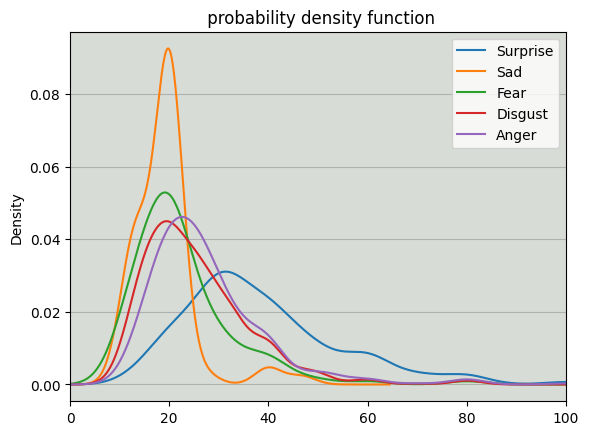

In [12]:

## Plot Propability Density Function

dist_sur  = pd.DataFrame(store_sur)
dist_sad  = pd.DataFrame(store_sad)
dist_fear = pd.DataFrame(store_fear)
dist_disg = pd.DataFrame(store_disg)
dist_anger= pd.DataFrame(store_anger)

fig, ax = plt.subplots()
dist_sur.plot.kde(ax=ax)
dist_sad.plot.kde(ax=ax)
dist_fear.plot.kde(ax=ax)
dist_disg.plot.kde(ax=ax)
dist_anger.plot.kde(ax=ax)
                         
plt.legend(["Surprise","Sad","Fear","Disgust","Anger"])

#dist.plot.hist(bins=20,density=True, ax=ax)
ax.set_title(' probability density function')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')
ax.set_xlim((0,100))

plt.show()


In [13]:
#layouts

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import dash_bootstrap_components as dbc
import base64
from PIL import Image
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import dash
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy.stats import gaussian_kde
import numpy as np



app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP,"https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css",'https://codepen.io/chriddyp/pen/bWLwgP.css'])

def b64_image(image_filename):
    with open(image_filename, "rb") as f:
        image_data = f.read()
    return "data:image/png;base64," + base64.b64encode(image_data).decode("utf-8")

image_path_2 = b64_image('/home/george/Downloads/pic-1.jpeg')
pil_img_2 = Image.open("/home/george/Downloads/pic-1.jpeg")

# Login page layout

login_layout = html.Div(
    style={
        "background-image": f"url('{image_path_2}')",
        "background-size": "cover",
        "background-position": "center",
        "background-repeat": "no-repeat",
        "position": "fixed",
        "top": 0,
        "left": 0,
        "width": "100%",
        "height": "100%",
        "font-family": "sans-serif"
    },
    children=[
        html.Div(
            className="form-box",
            style={
                "width": "500px",
                "background": "rgba(0,0,0,0.8)",
                "margin": "12% auto",
                "padding": "50px 0",
                "color": "#fff",
                "box-shadow": "0 0 20px 2px rgba(0,0,0,0.5)"
            },
            children=[
                html.H1("OASA-CITIZEN SERVICE", style={
                    "text-align": "center",
                    "margin-bottom": "80px",
                    "font-size": "30px",
                    "background-size": "cover"
                }),
                html.Div(
                    className="input-box",
                    style={
                        "margin": "31px auto",
                        "width": "80%",
                        "border-bottom": "1px solid #fff",
                        "padding-top": "10px",
                        "padding-bottom": "5px"
                    },
                    children=[
                        html.I(className="fa fa-user"),
                        dcc.Input(type="text", placeholder="User Id", id="username-input"),
                    ]
                ),
                html.Div(
                    className="input-box",
                    style={
                        "margin": "31px auto",
                        "width": "80%",
                        "border-bottom": "1px solid #fff",
                        "padding-top": "10px",
                        "padding-bottom": "5px"
                    },
                    children=[
                        html.I(className="fa fa-key"),
                        dcc.Input(type="password", placeholder="Password", id="password-input"),
                    ]
                ),
                html.Button("LOGIN", className="login-btn", id="login-button", n_clicks=0, style={
                    "margin": "40px auto 20px",
                    "width": " 80%",
                    "display": "block",
                    "color": "#fff",
                    "font-size": "20px"
                }),
                html.Div(id="error-message", style={"color": "red"})
            ]
        )
    ]
)

# Sidebar and content layout
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "22rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
}

CONTENT_STYLE = {
    "margin-left": "21.5rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}
image_path = '/home/george/Downloads/logo-sa-oasa-AE_symbols.png'
pil_img = Image.open("/home/george/Downloads/logo-sa-oasa-AE_symbols.png")


# Login page layout
sidebar = html.Div(
    [
        html.Img(src=pil_img),
        html.Hr(),
        html.P(
            "OASA - Citizen Service", className="lead", style={"font-size":"16px"}
        ),
        dbc.Nav(
            [
                dbc.NavLink("Home", href="/welcome", active="exact"),
                dbc.NavLink("Κατηγοριοποίηση Παραπόνων", href="/page-1", active="exact"),
                dbc.NavLink("Ανάλυση Συναισθήματος", href="/page-2", active="exact"),
                dbc.NavLink("Επείγοντα Παράπονα", href="/page-3", active="exact"),
                dbc.NavLink("Επεξήγηση Αποτελεσμάτων", href="/page-4", active="exact"),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)

def plot_pies(feelings, title):
    labels = [feeling[0] for feeling in feelings]
    values = [feeling[1] for feeling in feelings]

    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=title)

    return fig

    
def plot_per(frst_feeling, scd_feeling, trd_feeling, Feeling, start, i):
            rate = []

            i = start[0]
            while frst_feeling[i][0] == Feeling:
                rate.append(frst_feeling[i][1])
                if i < len(frst_feeling) - 1:
                    i += 1
                else:
                    break
            l1 = i - start[0]

            i = start[1]
            while scd_feeling[i][0] == Feeling:
                rate.append(scd_feeling[i][1])
                if i < len(scd_feeling) - 1:
                    i += 1
                else:
                    break
            l2 = i + l1 - start[1]

            i = start[2]
            while trd_feeling[i][0] == Feeling:
                rate.append(trd_feeling[i][1])
                if i < len(trd_feeling) - 1:
                    i += 1
                else:
                    break

            fig = go.Figure()
            fig.add_trace(go.Scatter(x=list(range(len(rate))), y=rate, mode='lines', name=Feeling))
            fig.update_layout(title=Feeling, xaxis_title='Index', yaxis_title='Rate')
            return fig

app.layout = html.Div(
    [
        dcc.Location(id="url", refresh=False),
        html.Div(id="page-content",style=CONTENT_STYLE)
    ]
)

@app.callback(
    Output("page-content", "children"),
    [Input("url", "pathname")]
)
def display_page_content(pathname):
    if pathname == "/":
        return login_layout
    elif pathname == "/welcome":
        image_path_1 = b64_image('/home/george/Downloads/eu_arch_logo_en.jpg')
        image_path_3 = b64_image('/home/george/Downloads/Greece2.0ENG.jpg')
        image_path_4 = b64_image('/home/george/Downloads/athina.jpeg')
        return html.Div(
        [
            sidebar,
            html.Div(
                [
                    html.Img(src=image_path_4, style={"width": "300px", "margin": "10px"}),
                    html.Img(src=image_path_1, style={"width": "300px", "margin": "10px"}),
                    html.Img(src=image_path_3, style={"width": "300px", "margin": "10px"}),
                ],
                style={"display": "flex", "justify-content": "center","margin-top": "200px"},
            ),
            html.Div(
                [
                    html.H1("OASA - Μονάδα Αρχιμήδης", style={"text-align": "center", "font-size": "40"}),
                    html.H1("Έργο: Εξυπηρέτηση Πολιτών", style={"text-align": "center", "font-size": "40"}),
                    html.P("Στα πλαίσια υλοποίησης του έργου 'Μονάδα ΑΡΧΙΜΗΔΗΣ: Έρευνα στην Τεχνητή Νοημοσύνη, την Επιστήμη Δεδομένων και τους Αλγορίθμους', αναπτύξαμε μία εφαρμογή όπου συλλέγει τα δεδομένα από τα διάφορα παράπονα για τις συγκοινωνίες στην χώρα μας και εξάγει χρήσιμες πληροφορίες για αυτά με σκοπό τη βελτίωση των ΜΜΜ και της εξυπηρέτησης των πολιτών.",
                           style={"text-align": "justify", "font-size": "25px"}),
                    html.P("Για την υλοποίηση του παρόντος έργου χρησιμοποιήσαμε σύγχρονες μεθόδους και εργαλεία όπως είναι αυτά της Μηχανικής Μάθησης (machine learning), της ανάλυσης δεδομένων (data analysis), αλλά και της οπτικοποίησης δεδομένων μέσω του dash_plotly",
                           style={"text-align": "justify", "font-size": "25px"}),
                ],
                style={
                    "background-color": "#0051a5",
                    "color": "white",
                    "position": "fixed",
                    "bottom": "0",
                    "width": "fixed",
                    "padding": "20px",
                    "box-sizing": "border-box",
                    "text-align": "center",
                    "font-size": "16px",
                },
            ),
        ]
    )
    elif pathname == "/page-1":
        image_path_5 = b64_image('/home/george/Downloads/wordcloud3.png')
        return html.Div(
            [
                sidebar,
                html.Div([
                    html.H1('Κατηγοριοποίηση Παραπόνων'),
                    html.Div([
                        html.Label('Επέλεξε Κατηγορία:'),
                        dcc.Dropdown(
                            id='chart-type',
                            options=[
                                {'label': 'Day', 'value': 'day'},
                                {'label': 'Week', 'value': 'week'},
                                {'label': 'Month', 'value': 'month'}
                            ],
                            value='day',
                            clearable=False
                        )
                    ]),
                html.Div([
                    dcc.Graph(id='complaints-chart')
                ]),
                html.Div([
                    dcc.Graph(id='categories-chart')
                ]),
                html.Div([
                    html.H2('WORDCLOUD'),
                    html.Img(src=image_path_5, style={"width": "1500px", "height":"500px","margin": "20px"}),
                ])
                ])

        ])
    elif pathname == "/page-2":
        return html.Div(
            [
                sidebar,
                html.Div(
                    [
                        html.H1("Ανάλυση Συναισθήματος"),
                        dcc.Tabs(id="tabs_feelings", value='tab-1', children=[
                            dcc.Tab(label='Πρώτα Συναισθήματα', value='tab-1'),
                            dcc.Tab(label='Γράφημα για Ποσοστά', value='tab-2'),
                            dcc.Tab(label='Παρουσίαση δεδομένων σε Ιστόγραμμα',value='tab-3'),
                            dcc.Tab(label='Πίνακας για Συνάρτηση Πυκνότητας Πιθανότητας',value='tab-4')
                        ]),
                        html.Div(id='tabs-content')
                    ]

                )
            ]
        )
    elif pathname == "/page-3":
        df = pd.read_csv("/home/george/Downloads/sos_comments_new.csv")
        return html.Div(
        [
            sidebar,
            html.Div(
                [
                    html.H1("Επείγοντα Παράπονα"),
                    html.Table(
                        # Header
                        [html.Tr([html.Th(col) for col in df.columns])] +

                        # Rows
                        [html.Tr([html.Td(df.iloc[i][col]) for col in df.columns]) for i in range(len(df))]
                    )

                ]
            )
        ]
    )
    elif pathname == "/page-4":
        return html.Div(
        [
            sidebar,
            html.Div(
                [
                    html.H1("Επεξήγηση Αποτελεσμάτων"),
                ]
            ),
            html.Div(
                [
                html.Iframe(src="https://colab.research.google.com/drive/1LlpIJ5zHrPKtu_rcgRN9X8ud48_hcf5F?usp=sharing#scrollTo=L8ftciB4_Prv",width="100%", height="600")
                ]
            )
        ]
    )
    # If the user tries to reach a different page, return a 404 message
    return html.Div(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ],
        className="p-3 bg-light rounded-3",
    )


@app.callback(
    Output("url", "pathname"),
    Output("error-message", "children"),
    Input("login-button", "n_clicks"),
    State("username-input", "value"),
    State("password-input", "value"),
)
def login(n_clicks, username, password):
    if n_clicks > 0:
        if username == "admin" and password == "password":
            return "/welcome", None
        else:
            return "/", "Invalid username or password."

    return "/", None


# Define the callback function to update the complaints chart
@app.callback(
    Output('complaints-chart', 'figure'),
    Input('chart-type', 'value')
)
def update_complaints_chart(chart_type):
    if chart_type == 'day':
        data = df_day
        title = 'Complaints by Day'
        x_label = 'Day'
    elif chart_type == 'week':
        data = df_week
        title = 'Complaints by Week'
        x_label = 'Week'
    else:
        data = df_month
        title = 'Complaints by Month'
        x_label = 'Month'

    fig = go.Figure(data=go.Bar(x=data['Entry Date'], y=data['count']))
    fig.update_layout(title=title, xaxis_title=x_label, yaxis_title='Count')
    return fig

# Define the callback function to update the categories chart
@app.callback(
    Output('categories-chart', 'figure'),
    Input('chart-type', 'value')
)
def update_categories_chart(chart_type):
    fig = px.pie(category_counts, values=category_counts.values, names=category_counts.index)
    fig.update_layout(title='Complaint Categories')
    return fig

@app.callback(
    Output('tabs-content', 'children'),
    Input('tabs_feelings', 'value')
)
def render_content(tab):
    if tab == 'tab-1':
        figg = plot_pies(frst_feeling, "1st Feeling")
        fig_1 = plot_pies(scd_feeling, "2st Feeling")
        fig_2 = plot_pies(trd_feeling, "3st Feeling")
        return html.Div([
            dcc.Graph(figure=figg),
            dcc.Graph(figure=fig_1),
            dcc.Graph(figure=fig_2),
        ])
    elif tab == 'tab-2':
        figa=plot_per(frst_feeling, scd_feeling, trd_feeling, "Surprise", [0, 0, 0], 4)
        figa_1=plot_per(frst_feeling, scd_feeling, trd_feeling, "Sadness", [prc1[0], prc2[0], prc3[0]], 5)
        figa_2=plot_per(frst_feeling, scd_feeling, trd_feeling, "Fear", [prc1[1], prc2[1], prc2[1]], 6)
        figa_3=plot_per(frst_feeling, scd_feeling, trd_feeling, "Disgust", [prc1[2], prc2[2], prc3[2]], 7)
        figa_4=plot_per(frst_feeling, scd_feeling, trd_feeling, "Anger", [prc2[3], prc2[3], prc3[3]], 8)
        return html.Div([
            dcc.Graph(figure=figa),
            dcc.Graph(figure=figa_1),
            dcc.Graph(figure=figa_2),
            dcc.Graph(figure=figa_3),
            dcc.Graph(figure=figa_4)
        ])
    elif tab == 'tab-3':
        dist1 = go.Histogram(x=store_sur, nbinsx=20, name="Surprise")
        data1 = [dist1]
        layout1 = go.Layout(title="Surprise",showlegend=True,legend=dict(x=0.7, y=0.95),plot_bgcolor='#d8dcd6',xaxis=dict(range=[0, 100]),yaxis=dict(gridcolor='gray'))
        
        dist2 = go.Histogram(x=store_sad, nbinsx=20, name="Sad")
        data2 = [dist2]
        layout2 = go.Layout(title="Sad",showlegend=True,legend=dict(x=0.7, y=0.95),plot_bgcolor='#d8dcd6',xaxis=dict(range=[0, 100]),yaxis=dict(gridcolor='gray'))
        
        dist3 = go.Histogram(x=store_fear, nbinsx=20, name="Fear")
        data3 = [dist3]
        layout3= go.Layout(title="Fear",showlegend=True,legend=dict(x=0.7, y=0.95),plot_bgcolor='#d8dcd6',xaxis=dict(range=[0, 100]),yaxis=dict(gridcolor='gray'))
        
        dist4 = go.Histogram(x=store_disg, nbinsx=20, name="Disgust")
        data4 = [dist4]
        layout4= go.Layout(title="Disgust",showlegend=True,legend=dict(x=0.7, y=0.95),plot_bgcolor='#d8dcd6',xaxis=dict(range=[0, 100]),yaxis=dict(gridcolor='gray'))

        dist5 = go.Histogram(x=store_anger, nbinsx=20, name="Anger")
        data5 = [dist5]
        layout5= go.Layout(title="Anger",showlegend=True,legend=dict(x=0.7, y=0.95),plot_bgcolor='#d8dcd6',xaxis=dict(range=[0, 100]),yaxis=dict(gridcolor='gray'))

        fig1 = go.Figure(data=data1,layout=layout1)
        fig2 = go.Figure(data=data2,layout=layout2)
        fig3 = go.Figure(data=data3,layout=layout3)
        fig4 = go.Figure(data=data4,layout=layout4)
        fig5 = go.Figure(data=data5,layout=layout5)

        return html.Div([
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2),
            dcc.Graph(figure=fig3),
            dcc.Graph(figure=fig4),
            dcc.Graph(figure=fig5)
        ])
    elif tab == 'tab-4':

        # Create DataFrame for each distribution
        dist_sur = pd.DataFrame(store_sur)
        dist_sad = pd.DataFrame(store_sad)
        dist_fear = pd.DataFrame(store_fear)
        dist_disg = pd.DataFrame(store_disg)
        dist_anger = pd.DataFrame(store_anger)

        # Calculate KDE values
        kde_sur = gaussian_kde(dist_sur[0])
        kde_sad = gaussian_kde(dist_sad[0])
        kde_fear = gaussian_kde(dist_fear[0])
        kde_disg = gaussian_kde(dist_disg[0])
        kde_anger = gaussian_kde(dist_anger[0])

        # Define the x range for the KDE plot
        x_range = np.linspace(0, 100, 1000)

        # Calculate the KDE values for the x range
        kde_values_sur = kde_sur(x_range)
        kde_values_sad = kde_sad(x_range)
        kde_values_fear = kde_fear(x_range)
        kde_values_disg = kde_disg(x_range)
        kde_values_anger = kde_anger(x_range)

        # Create a figure
        fig = go.Figure()

        # Add KDE plots to the figure
        fig.add_trace(go.Scatter(x=x_range, y=kde_values_sur, mode='lines', name='Surprise'))
        fig.add_trace(go.Scatter(x=x_range, y=kde_values_sad, mode='lines', name='Sad'))
        fig.add_trace(go.Scatter(x=x_range, y=kde_values_fear, mode='lines', name='Fear'))
        fig.add_trace(go.Scatter(x=x_range, y=kde_values_disg, mode='lines', name='Disgust'))
        fig.add_trace(go.Scatter(x=x_range, y=kde_values_anger, mode='lines', name='Anger'))

        # Update layout
        fig.update_layout(
            title='Kernel Density Estimation (KDE) Plots',
            yaxis_title='Density',
            showlegend=True
        )
        return html.Div([
            dcc.Graph(figure=fig)
        ])
    

#@app.callback(
#    Output("output_div", "children"),
#    Input("submit_button", "n_clicks"),
#    State("insert_text", "value"),
#)
#def update_output(n_clicks, insert_text):
#    if n_clicks > 0:
#        return html.Div(f"You entered: {insert_text}")
#    return html.Div()

if __name__ == "__main__":
    app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [20/Jun/2023 23:09:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 23:09:23] "GET /_dash-component-suites/dash/deps/react@16.v2_9_2m1680537769.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 23:09:23] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_4_1m1683882999.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 23:09:23] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_2m1680537769.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 23:09:23] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_9_2m1680537769.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 23:09:23] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_9_2m1680537769.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 23:09:23] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_9_1m1680537769.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2023 